In [1]:
import numpy as np
import scipy as sc
import matplotlib as mpl

from sklearn.linear_model import LogisticRegression, LinearRegression
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# set larger font sizes and the style
font_size = 28
mpl.rcParams.update({'font.size': font_size})
mpl.rcParams['xtick.labelsize'] = font_size-5
mpl.rcParams['ytick.labelsize'] = font_size-5
plt.style.use('bmh')


#mpl.rc('font', **font)

# Use just "%matplotlib" if you want the graphs to be displayed in a new window
#%matplotlib 
%matplotlib inline

In [2]:
# LARGE DOGS AND SMALL HORSES - SET DISTRIBUTION PARAMETERS
# MAY OR MAY NOT CORRESPOND TO ACTUAL EARTH MAMMAL DIMENSIONS

number_of_observations = 100 # per class
dog_weight_mean = 80
dog_weight_stddev = 10
dog_height_mean = 20
dog_height_stddev = 10
horse_weight_mean = 100
horse_weight_stddev = 10
horse_height_mean = 42
horse_height_stddev = 10

In [4]:
# GENERATE SAMPLE OBSERVATIONS
np.random.seed(42)
dog_weights = np.random.normal(dog_weight_mean,
                               dog_weight_stddev,
                               number_of_observations)
dog_heights = np.random.normal(dog_height_mean,
                               dog_height_stddev,
                               number_of_observations)
dog_targets = [0]*number_of_observations
horse_weights = np.random.normal(horse_weight_mean,
                                 horse_weight_stddev,
                                 number_of_observations).clip(80)
horse_heights = np.random.normal(horse_height_mean,
                                 horse_height_stddev,
                                 number_of_observations)
horse_targets = [1]*number_of_observations

weights = np.hstack((dog_weights, horse_weights))
heights = np.hstack((dog_heights, horse_heights))

X = np.vstack((weights, heights)).T.clip(min=1)
y = np.hstack((dog_targets,horse_targets))

X_horses = X[y == 1]
y_horses = y[y == 1]

X_dogs = X[y == 0]
y_dogs = y[y == 0]

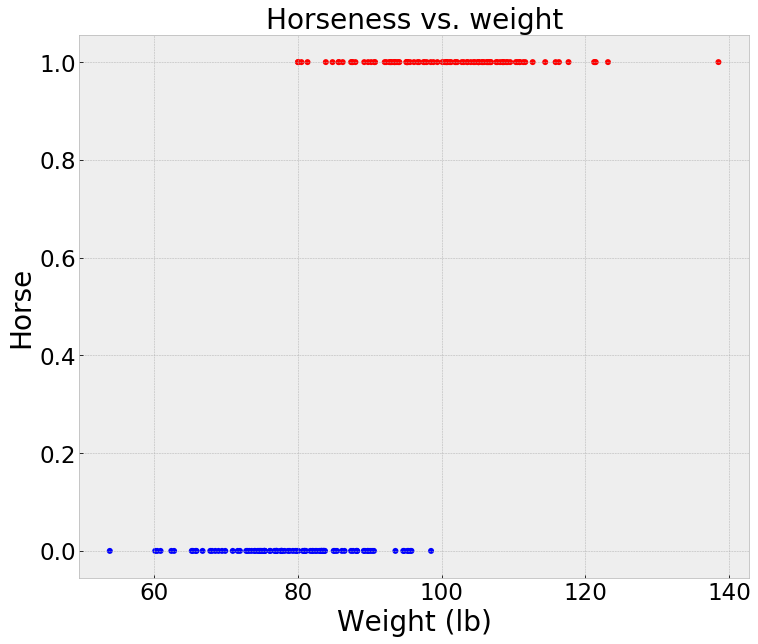

In [5]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
ax.scatter(X[:,0], y, c=y, cmap='bwr', edgecolor='')
ax.set_xlabel('Weight (lb)',fontsize=font_size)
ax.set_ylabel('Horse',fontsize=font_size)
ax.set_title('Horseness vs. weight',fontsize=font_size)
plt.show()

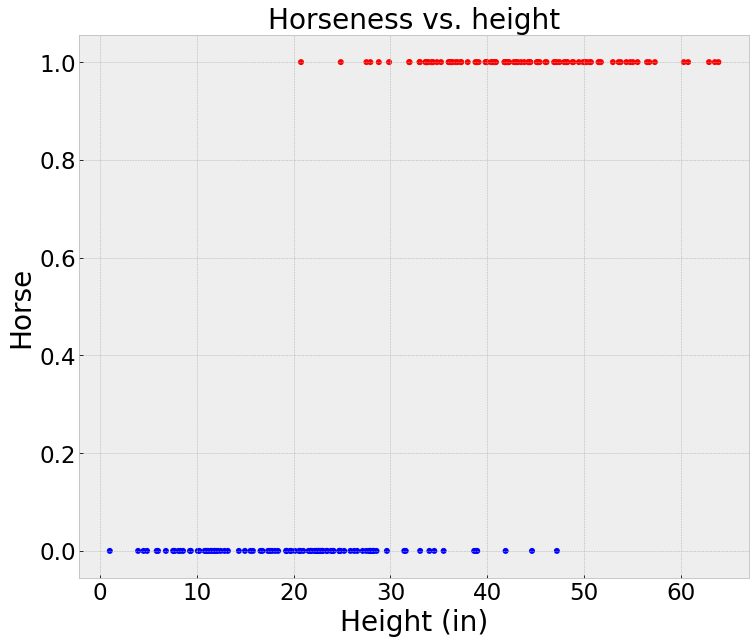

In [25]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
ax.scatter(X[:,1], y, c=y, cmap='bwr', edgecolor='')
ax.set_xlabel('Height (in)',fontsize=font_size)
ax.set_ylabel('Horse',fontsize=font_size)
ax.set_title('Horseness vs. height',fontsize=font_size)
plt.show()

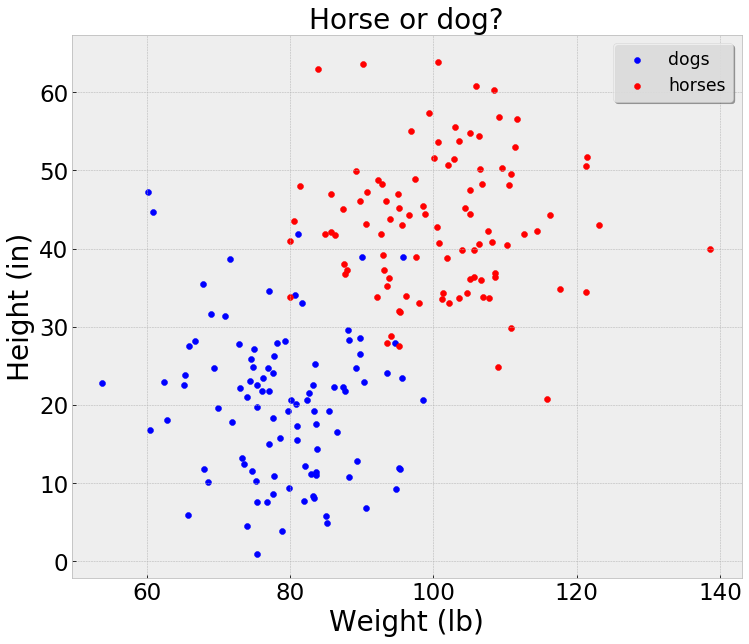

In [26]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
ax.scatter(X_dogs[:,0], X_dogs[:,1], color='b', label='dogs')
ax.scatter(X_horses[:,0], X_horses[:,1], color='r', label='horses')
ax.legend(shadow=True, fontsize='xx-large')
ax.set_xlabel('Weight (lb)',fontsize=font_size)
ax.set_ylabel('Height (in)',fontsize=font_size)
ax.set_title('Horse or dog?',fontsize=font_size)
plt.show()

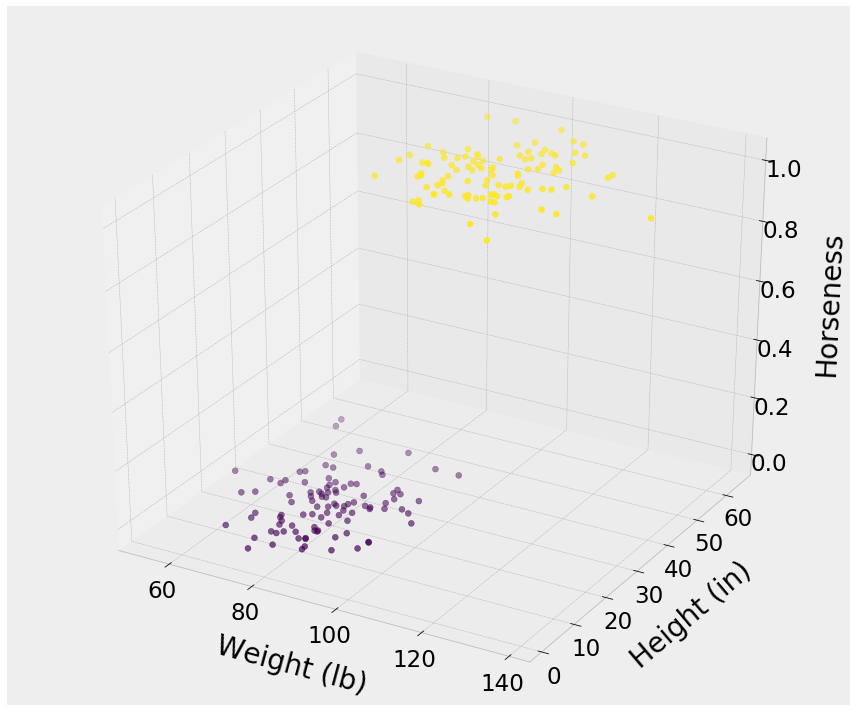

In [6]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], y, c=y,s=35)
ax.set_xlabel('Weight (lb)',fontsize=font_size,labelpad=25.0)
ax.set_ylabel('Height (in)',fontsize=font_size,labelpad=25.0)
ax.set_zlabel('Horseness',fontsize=font_size,labelpad=25.0)
plt.tight_layout()
plt.show()


In [9]:
log_model = LogisticRegression()
log_model.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [10]:
x_ = np.linspace(40, 160, 100)

In [11]:
log_model.coef_[0]

array([ 0.00946155,  0.14221671])

In [12]:
discriminator_line = -(log_model.intercept_ + log_model.coef_[0][0]*x_)/log_model.coef_[0][1]

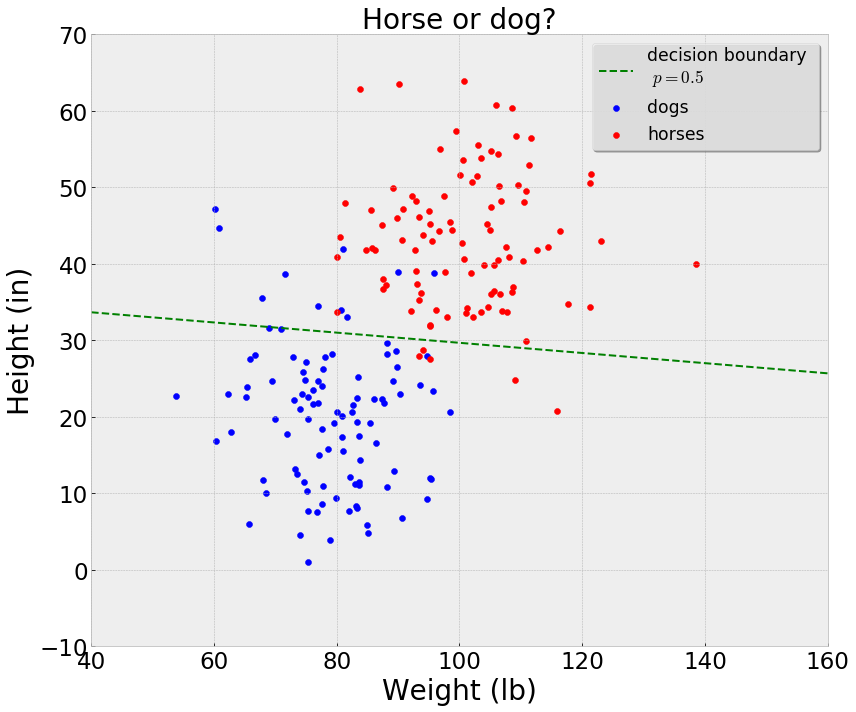

In [13]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)

ax.scatter(X_dogs[:,0], X_dogs[:,1], color='b', label='dogs')
ax.scatter(X_horses[:,0], X_horses[:,1], color='r', label='horses')
ax.plot(x_, discriminator_line, 'g--', label = "decision boundary \n $p=0.5$")
ax.set_xlim([40,160])
ax.set_ylim([-10,70])
ax.legend(shadow=True, fontsize='xx-large')
plt.xlabel('Weight (lb)',fontsize=font_size)
plt.ylabel('Height (in)',fontsize=font_size)
plt.title('Horse or dog?',fontsize=font_size)
plt.tight_layout()
plt.show()


In [14]:
xx, yy = np.meshgrid(np.linspace(40,160,100), np.linspace(0,70,100))

In [15]:
xy = np.c_[xx.ravel(), yy.ravel()]

In [16]:
z = log_model.predict_proba(xy)[:,1].reshape(xx.shape)

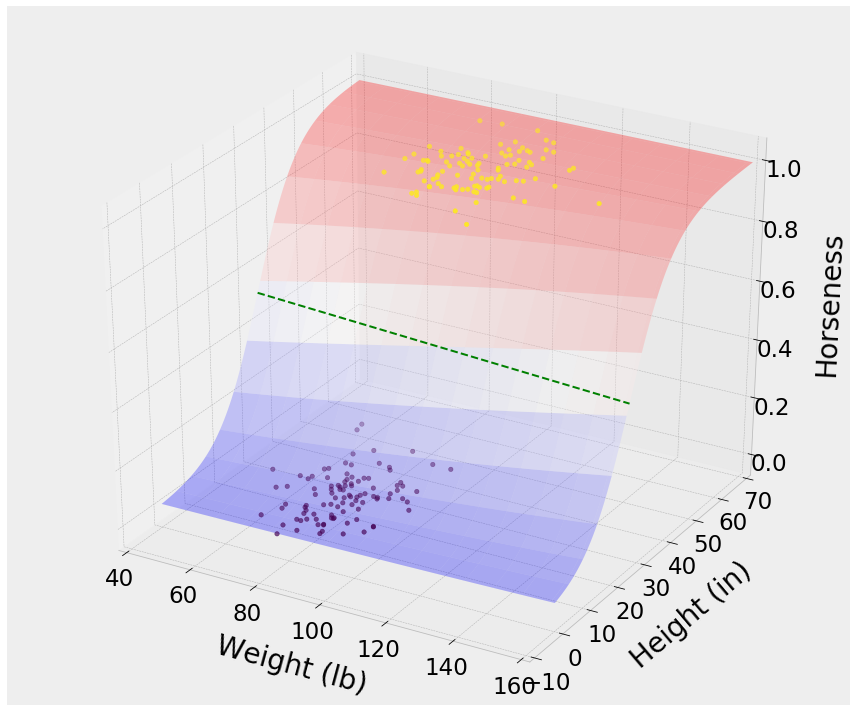

In [17]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], y, c=y)
ax.plot_surface(xx, yy, z, cmap='bwr', alpha=0.3, rstride=7, cstride=7)
ax.plot(x_, discriminator_line, zs=0.5, linestyle='--', color='g')
ax.set_xlim([40,160])
ax.set_ylim([-10, 70])
ax.set_xlabel('Weight (lb)',fontsize=font_size,labelpad=25.0)
ax.set_ylabel('Height (in)',fontsize=font_size,labelpad=25.0)
ax.set_zlabel('Horseness',fontsize=font_size,labelpad=25.0)
plt.tight_layout()
plt.show()


## Fit with linear regression

In [18]:
lin_model_w = LinearRegression()
lin_model_w.fit(X[:,:1],y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
x_ = np.linspace(40,160,100)
line_ = lin_model_w.coef_*x_ + lin_model_w.intercept_

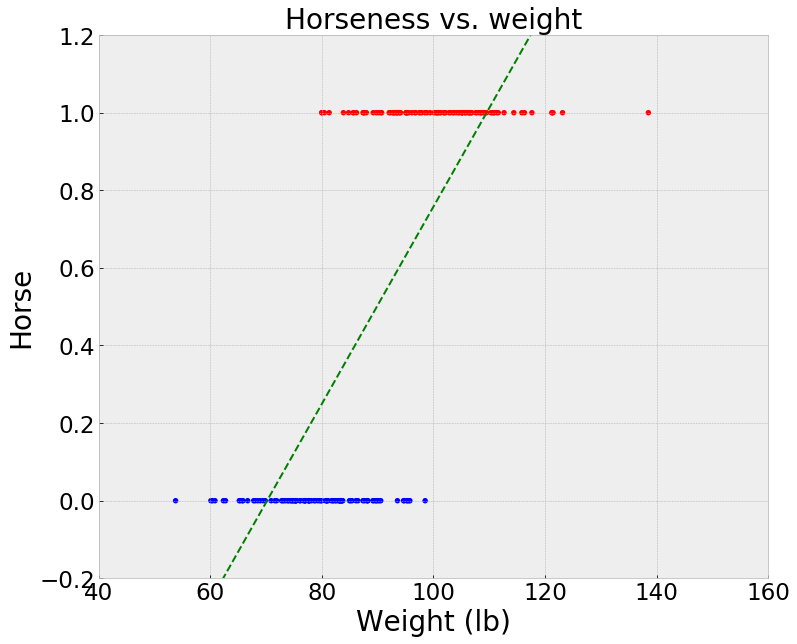

In [20]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
ax.scatter(X[:,0], y, c=y, cmap='bwr', edgecolor='',s=30)
ax.plot(x_, line_, 'g--')
ax.set_xlim([40,160])
ax.set_ylim([-0.2,1.201])
ax.set_xlabel('Weight (lb)',fontsize=font_size)
ax.set_ylabel('Horse',fontsize=font_size)
ax.set_title('Horseness vs. weight',fontsize=font_size)
plt.show()

## Fit with Logistic Regression

In [40]:
log_model_w = LogisticRegression()
log_model_w.fit(X[:,:1],y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [41]:
x_ = np.linspace(40,160,100).reshape(-1,1)
sigmoid = log_model_w.predict_proba(x_)[:,1]

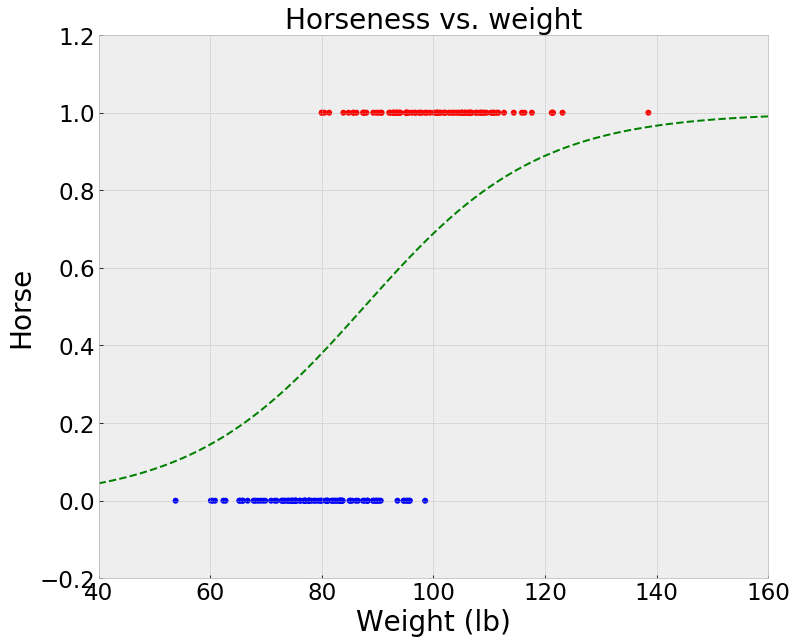

In [42]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
ax.scatter(X[:,0], y, c=y, cmap='bwr', edgecolor='')
ax.plot(x_, sigmoid, 'g--')
ax.set_xlim([40,160])
ax.set_ylim([-0.2,1.201])
ax.set_xlabel('Weight (lb)',fontsize=font_size)
ax.set_ylabel('Horse',fontsize=font_size)
ax.set_title('Horseness vs. weight',fontsize=font_size)
plt.show()

## Deciding on the cutoff point

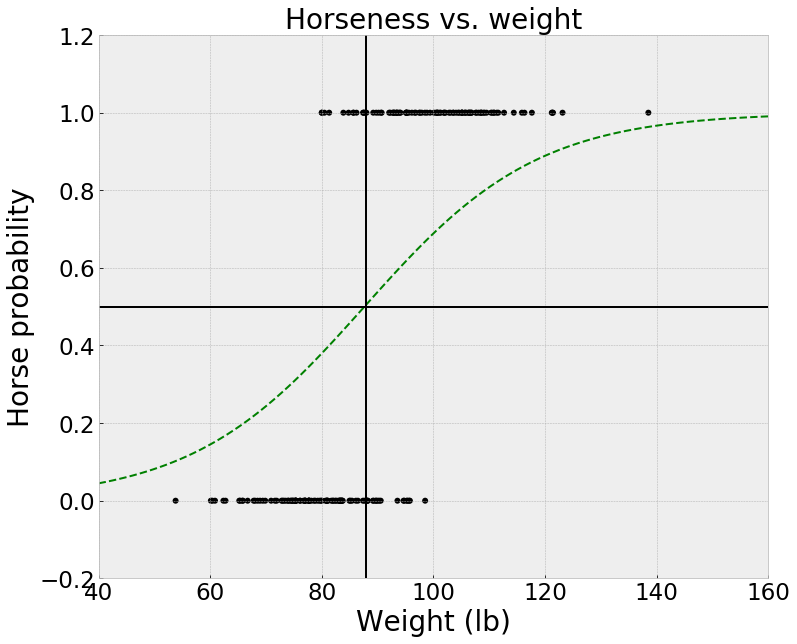

In [52]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
ax.scatter(X[:,0], y, color='k', edgecolor='')
ax.plot(x_, sigmoid, 'g--')
ax.axhline(0.5, color='k')
ax.axvline(88, color='k')

ax.set_xlim([40,160])
ax.set_ylim([-0.2,1.201])
ax.set_xlabel('Weight (lb)',fontsize=font_size)
ax.set_ylabel('Horse probability',fontsize=font_size)
ax.set_title('Horseness vs. weight',fontsize=font_size)
plt.show()

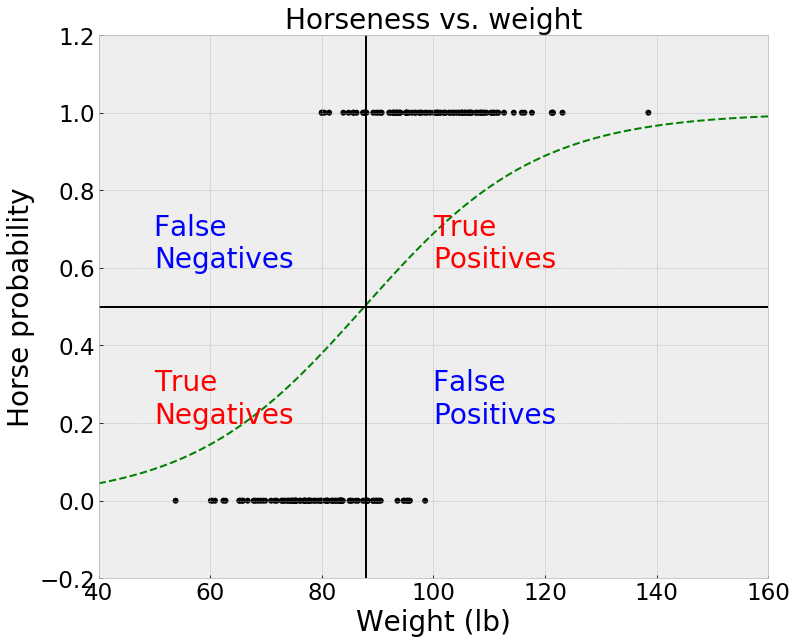

In [53]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)

ax.scatter(X[:,0], y, color='k', edgecolor='')
ax.plot(x_, sigmoid, 'g--')
ax.axhline(0.5, color='k')
ax.axvline(88, color='k')

ax.text(50, 0.6, 'False \nNegatives', size=font_size,color='blue')
ax.text(50, 0.2, 'True \nNegatives', size=font_size,color='red')
ax.text(100, 0.6, 'True \nPositives', size=font_size,color='red')
ax.text(100, 0.2, 'False \nPositives', size=font_size,color='blue')

ax.set_xlim([40,160])
ax.set_ylim([-0.2,1.201])
ax.set_xlabel('Weight (lb)',fontsize=font_size)
ax.set_ylabel('Horse probability',fontsize=font_size)
ax.set_title('Horseness vs. weight',fontsize=font_size)
plt.show()

## Confusion matrices

Thus in binary classification, the count of true negatives is `C_{0,0}`, false negatives is `C_{1,0}`, true positives is `C_{1,1}` and false positives is `C_{0,1}`.

In sklearn it is:

| TN | FP |
-------------
| FN | TP |
-------------


In [54]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, ax, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    p = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set_title(title,fontsize=font_size)
    
    plt.colorbar(p)
    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_xticklabels(classes, rotation=45)
    ax.set_yticks(tick_marks)
    ax.set_yticklabels(classes)
   
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, cm[i, j],
                 horizontalalignment="center", size = font_size,
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    ax.set_ylabel('True label',fontsize=font_size)
    ax.set_xlabel('Predicted label',fontsize=font_size)

In [55]:
## Run log reg on all the data
classifier = LogisticRegression()
y_pred = classifier.fit(X,y).predict(X)
y_true = y

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_true, y_pred)
np.set_printoptions(precision=2)
print(cnf_matrix)

[[90 10]
 [ 5 95]]


Confusion matrix, without normalization
[[90 10]
 [ 5 95]]


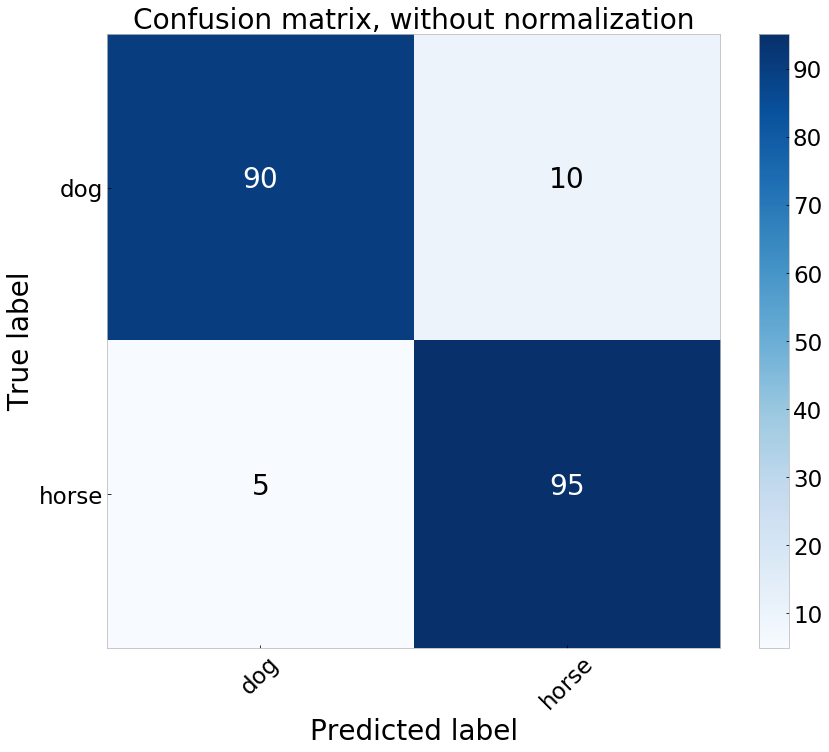

In [56]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
ax.grid(False)
class_names = ["dog","horse"]
plot_confusion_matrix(cnf_matrix, ax, classes=class_names,
                      title='Confusion matrix, without normalization')

## Normalized version of confusion matrix

If there is a class inbalance (for visualization purposes) you may want to consider looking at a normalized version

Normalized confusion matrix
[[ 0.9   0.1 ]
 [ 0.05  0.95]]


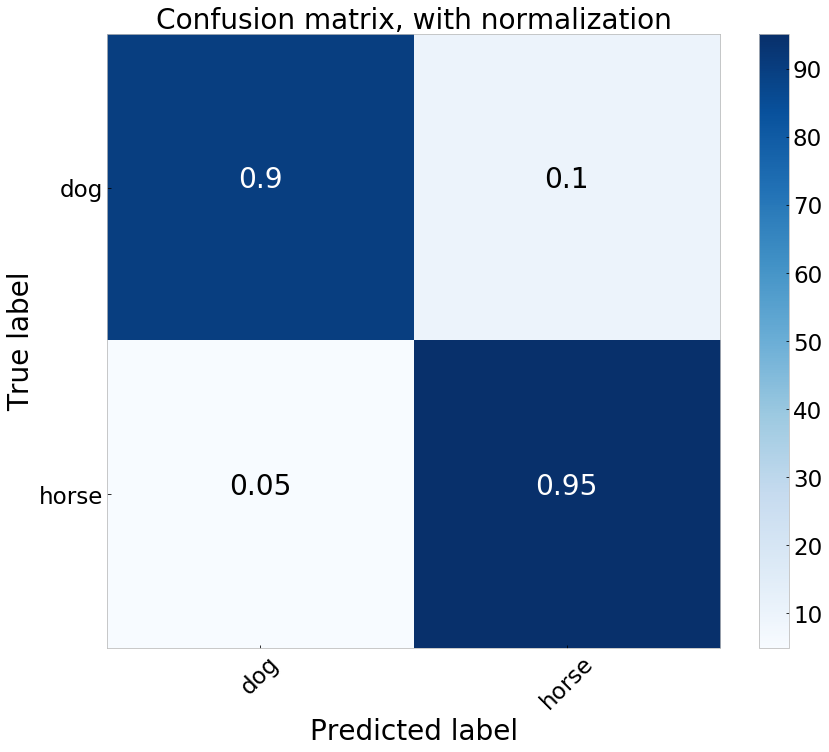

In [57]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
ax.grid(False)
class_names = ["dog","horse"]
plot_confusion_matrix(cnf_matrix, ax, classes=class_names,normalize=True,
                      title='Confusion matrix, with normalization')

## ROC Curves

Remember when we selected that probability threshold to be 0.5?  If we slide it a little then we get a different confusion matrix.  If we stack these matrices and plot at the true positive rate and false positive rates then we have a ROC Curve.

ROC - receiver operating characteristic is a way of exploring the performance of a model by varying the decision threshold of a classifier.

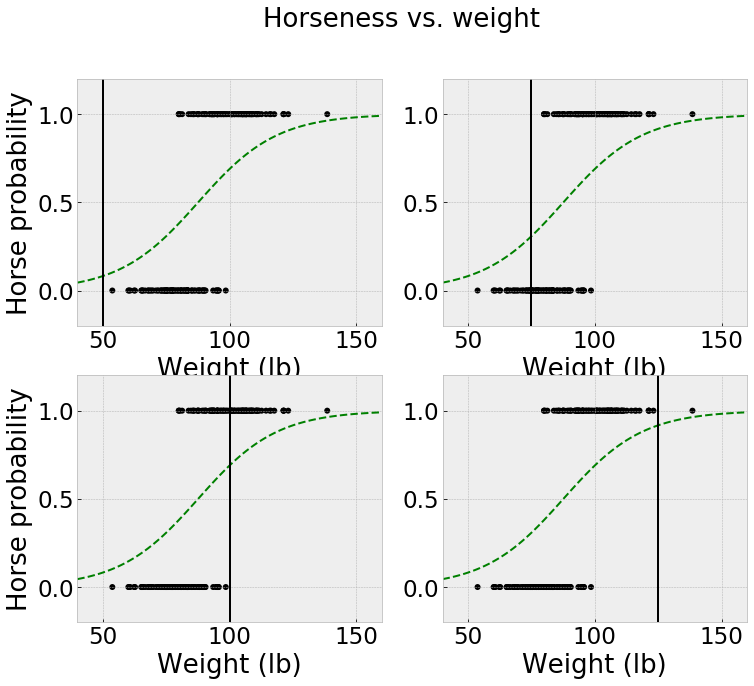

In [74]:
fig = plt.figure(figsize=(12,10))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)                      
ax4 = fig.add_subplot(224)

def make_subplot(ax,threshold,ylabel=True):
    ax.scatter(X[:,0], y, color='k', edgecolor='')
    ax.plot(x_, sigmoid, 'g--')
    #ax.axhline(threshold[0], color='k')
    ax.axvline(threshold, color='k')

    ax.set_xlim([40,160])
    ax.set_ylim([-0.2,1.201])
    
    ax.set_xlabel('Weight (lb)',fontsize=font_size-2)
    
    if ylabel:
        ax.set_ylabel('Horse probability',fontsize=font_size-2)
    
plt.suptitle('Horseness vs. weight',fontsize=font_size-2)

make_subplot(ax1,50)
make_subplot(ax2,75,ylabel=False)
make_subplot(ax3,100)
make_subplot(ax4,125,ylabel=False)